In [161]:
import keras.models
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Activation, GaussianNoise
import os
from skimage.util import random_noise

In [137]:
# Key:
# 0 - Down
# 1 - Up
# 2 - Wave

small_to_large_image_size_ratio = 0.1

X_train = []
X_test = []
Y_train = []
Y_test = []

source_directory = "dataset/thumbsdown/KeyFrames/train"
for filename in os.listdir(source_directory):
    image = cv2.imread(source_directory + "/" + filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


    image = cv2.resize(image,  # original image
                           (0, 0),  # set fx and fy, not the final size
                           fx=small_to_large_image_size_ratio,
                           fy=small_to_large_image_size_ratio,
                           interpolation=cv2.INTER_NEAREST)
    image = random_noise(image, mode='s&p', amount=0.011)

    X_train.append(image)
    Y_train.append(0)

source_directory = "dataset/thumbsup/KeyFrames/train"
for filename in os.listdir(source_directory):
    image = cv2.imread(source_directory + "/" + filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = cv2.resize(image,  # original image
                           (0, 0),  # set fx and fy, not the final size
                           fx=small_to_large_image_size_ratio,
                           fy=small_to_large_image_size_ratio,
                           interpolation=cv2.INTER_NEAREST)
    image = random_noise(image, mode='s&p', amount=0.011)

    X_train.append(image)
    Y_train.append(1)

source_directory = "dataset/wave/KeyFrames/train"
for filename in os.listdir(source_directory):
    image = cv2.imread(source_directory + "/" + filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = cv2.resize(image,  # original image
                           (0, 0),  # set fx and fy, not the final size
                           fx=small_to_large_image_size_ratio,
                           fy=small_to_large_image_size_ratio,
                           interpolation=cv2.INTER_NEAREST)
    image = random_noise(image, mode='s&p', amount=0.011)

    X_train.append(image)
    Y_train.append(2)

source_directory = "dataset/thumbsdown/KeyFrames/test"
for filename in os.listdir(source_directory):
    image = cv2.imread(source_directory + "/" + filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = cv2.resize(image,  # original image
                           (0, 0),  # set fx and fy, not the final size
                           fx=small_to_large_image_size_ratio,
                           fy=small_to_large_image_size_ratio,
                           interpolation=cv2.INTER_NEAREST)
    image = random_noise(image, mode='s&p', amount=0.011)

    X_test.append(image)
    Y_test.append(0)

source_directory = "dataset/thumbsup/KeyFrames/test"
for filename in os.listdir(source_directory):
    image = cv2.imread(source_directory + "/" + filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = cv2.resize(image,  # original image
                           (0, 0),  # set fx and fy, not the final size
                           fx=small_to_large_image_size_ratio,
                           fy=small_to_large_image_size_ratio,
                           interpolation=cv2.INTER_NEAREST)
    image = random_noise(image, mode='s&p', amount=0.011)

    X_test.append(image)
    Y_test.append(1)

source_directory = "dataset/wave/KeyFrames/test"
for filename in os.listdir(source_directory):
    image = cv2.imread(source_directory + "/" + filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = cv2.resize(image,  # original image
                           (0, 0),  # set fx and fy, not the final size
                           fx=small_to_large_image_size_ratio,
                           fy=small_to_large_image_size_ratio,
                           interpolation=cv2.INTER_NEAREST)
    image = random_noise(image, mode='s&p', amount=0.011)
    X_test.append(image)
    Y_test.append(2)


print(np.shape(X_train))    # 1112, 108, 192
print(np.shape(X_test))     # 257, 108, 192

(1112, 108, 192)
(257, 108, 192)


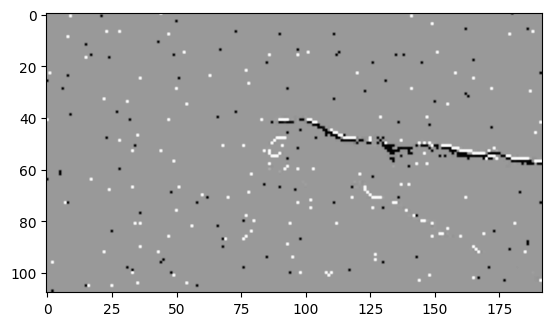

In [138]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

X_train = X_train.reshape(1112, 108, 192, 1)
X_test = X_test.reshape(257, 108, 192, 1)
Y_train = Y_train.reshape(1112)
Y_test = Y_test.reshape(257)

plt.imshow(X_test[75].reshape(108, 192),cmap='Greys')

In [154]:
act_layer = 'sigmoid'
model = Sequential()

# add model layers
model.add(GaussianNoise(0.01, input_shape=(108, 192, 1)))
model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(108, 192, 1)))
model.add(Conv2D(8, kernel_size=3, activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gaussian_noise_38 (Gaussian  (None, 108, 192, 1)      0         
 Noise)                                                          
                                                                 
 conv2d_92 (Conv2D)          (None, 106, 190, 16)      160       
                                                                 
 conv2d_93 (Conv2D)          (None, 104, 188, 8)       1160      
                                                                 
 dropout_34 (Dropout)        (None, 104, 188, 8)       0         
                                                                 
 flatten_38 (Flatten)        (None, 156416)            0         
                                                                 
 dense_48 (Dense)            (None, 3)                 469251    
                                                     

In [155]:
n_epochs = 5
history = model.fit(x=X_train,y=Y_train, epochs=n_epochs)

Epoch 1/5
35/35 [==============================] - 10s 256ms/step - loss: 1.0636 - accuracy: 0.6223
Epoch 2/5
35/35 [==============================] - 9s 255ms/step - loss: 0.2455 - accuracy: 0.9344
Epoch 3/5
35/35 [==============================] - 9s 251ms/step - loss: 0.0372 - accuracy: 0.9964
Epoch 4/5
35/35 [==============================] - 9s 246ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 5/5
35/35 [==============================] - 9s 246ms/step - loss: 0.0038 - accuracy: 1.0000


In [156]:
score = model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

9/9 [==============================] - 1s 41ms/step - loss: 0.2085 - accuracy: 0.9105
Test accuracy: 0.9105058312416077


In [159]:
model.save("CNN_model")

INFO:tensorflow:Assets written to: CNN_model\assets


INFO:tensorflow:Assets written to: CNN_model\assets


In [162]:
saved_model = keras.models.load_model("CNN_model")
score = saved_model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

9/9 [==============================] - 1s 47ms/step - loss: 0.2085 - accuracy: 0.9105
Test accuracy: 0.9105058312416077
